In [282]:
import numpy as np
import matplotlib.pyplot as plt # For some visualizations
import time # To find the time taken for execution of algorithms

In [372]:
# PLEASE NOTE : While the function has been modified to account of numpy arrays, it does not change the essential components

def gradient_descent(gradient, init_, learn_rate, n_iter=50, tol=1e-06):
    history = [] # A history of the weights to help with visualization
    
    # This is a programming quirk
    if(isinstance(init_, int) or isinstance(init_, float)):
        x = init_
    else:
        x = init_.copy() #For numpy arrays we make a copy otherwise all the elements would be the same because of memory management of numpy
        
    for _ in range(n_iter):
        delta = -learn_rate * gradient(x) # Following the definition of gradient descent
        if np.all(np.abs(delta) <= tol):
            break # The values are small enough which means we have reached an optima
        x += delta
        
        # Store the weight in history
        # Cases for the same reasons mentioned above
        if(type(x) == type(0.1)):
            history.append(x)
        else:
            history.append(x.copy())

    return x, history

## a) (i)
Given $f(x) = x^2 + 3x + 4$  
Therefore $f'(x) = 2x + 3$ 

Number of iterations is  61
The minima of the function is at  -1.4999957090124856


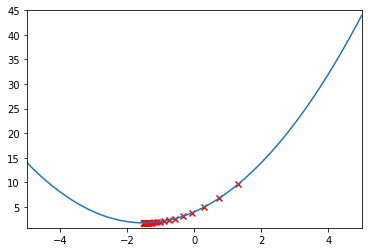

In [373]:
# Get the optimum x as well as the history of x so that we can visualize how gradient descent proceeded
ans, list_x = gradient_descent(gradient = lambda x : 2*x + 3, init_ = 2, learn_rate=0.1, n_iter=100, tol=1e-06)
print("Number of iterations is ", len(list_x))
print("The minima of the function is at ", ans)

# Visualization of the function and weights during Gradient Descent

# This creates a plot of the function
x = np.linspace(-5, 5, 1000, endpoint=True)
y = x**2 + 3*x + 4

# This marks the intermediate x achieved during gradient descent
list_x = np.array(list_x)
y1 = list_x**2 + 3*list_x + 4

# Final plotting 
axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([y.min()-1, y.max()+1])
plt.plot(x,y)
plt.scatter(list_x, y1, marker='x', color='r')
plt.show()

## a) (ii)
$f(x) = x^4 -3x^2 + 2x$  
$f'(x) = 4x^3 - 6x + 2$

Number of iterations is  28
The minima of the function is at  -1.3660258878162024


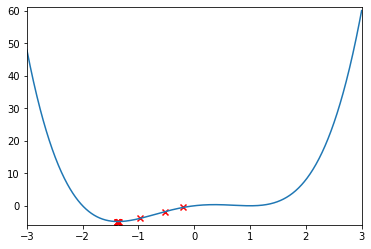

In [374]:
# Get the optimum x as well as the history of x so that we can visualize how gradient descent proceeded
ans, list_x = gradient_descent(gradient = lambda x : 4*x*x*x - 6*x + 2, init_ = 2, learn_rate=0.1, n_iter=50, tol=1e-06)
print("Number of iterations is ", len(list_x))
print("The minima of the function is at ", ans)

# Visualization of the function and weights during Gradient Descent


# This creates a plot of the function
x = np.linspace(-3, 3, 1000, endpoint=True)
y = x**4 - 3*x**2 + 2*x

# This marks the intermediate x achieved during gradient descent
list_x = np.array(list_x)
y1 = list_x**4 - 3*list_x**2 + 2*list_x

# Final Plotting
axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([y.min()-1, y.max()+1])
plt.plot(x,y)
plt.scatter(list_x, y1, marker='x', color='r')
plt.show()

## Q1 (b)
Gradient for $\hat{y} = ax + b$  
We are given the actual values $y$. The error is the MSE error :  
$ E = \frac{1}{N} \sum_{i=1}^N (y - \hat{y_i})^2$ where $ \hat{y_i} = ax_i + b$  
$\frac{\partial E}{\partial a} = \frac{2}{N}\sum_{i=1}^N(y - \hat{y})(-x_i)$  
$\frac{\partial E}{\partial b} = \frac{2}{N}\sum_{i=1}^N(y - \hat{y})(-1)$



In [357]:
# Q1 c : Generating the data for running Gradient Descent 

np.random.seed(0) # seed is provided so that the work is reproducible
# X_given = np.random.normal(loc=1.5, scale=2.5, size=10000) # Mean is 1.5 and std is 2.5
X_given = 2.5 * np.random.randn(10000) + 1.5
res = 1.5 * np.random.randn(10000)
y_given = 2 + 0.3 * X_given + res

In [358]:
def regression_gradient(w, X=X_given, y=y_given):
    y_hat = w[0]*X + w[1] # compute the predictions
    N = len(X) # Need to average it out by the size of the data
    
    # gradients follow from formula above
    grad_0 = (2/N) * np.sum(-(y - y_hat)*(X)) 
    grad_1 = (2/N) * np.sum(-(y - y_hat))
    return np.array(([grad_0, grad_1])) # Convert to numpy array

In [359]:
# Helper function to calculate MSE loss
def MSE_loss(X, y, w):
    y_hat = w[0]*X + w[1] # Compute prediction
    N = len(X)
    return np.sum((y-y_hat)**2) / N # Sum of squares error / N

## Q1 (c) Linear Regression
We run the vanilla gradient descent here (the entire dataset is is considered and not smaller batches).  
The output also provides the average time taken, the final weights and a plot of the loss.

Time taken is  0.041296348571777344 s
Number of iterations is  705
Final values for a and b are  [0.29533185 2.02321978] and the loss is  2.2187210129543993


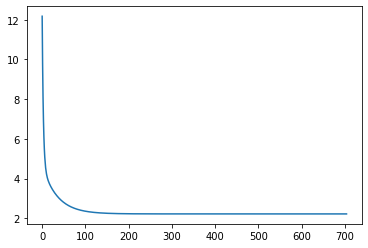

In [360]:
np.random.seed(0)
init_ = np.random.randn(2)

# Run vanilla gradient descent
w, history = gradient_descent(gradient = regression_gradient, init_ = init_, learn_rate = 0.01, n_iter=1000, tol=1e-06)

loss_history = []
# Compute the loss history using the weight history
for i in range(len(history)):
    l = MSE_loss(X_given, y_given, history[i])
    loss_history.append(l)

# Plot the loss history to get an idea about training
plt.plot( loss_history)

# For each gradient descent call we note the total time taken,and then average it out
T = 0
for i in range(50):
    #Same seed because initial conditions must be same
    np.random.seed(0)
    init_ = np.random.randn(2)
    
    
    tick = time.time() # start time
    w, history = gradient_descent(gradient = regression_gradient, init_ = init_, learn_rate = 0.01, n_iter=1000, tol=1e-06)
    tock = time.time() # end time
    
    T += tock - tick

print("Time taken is ", T/50, "s")
print("Number of iterations is ", len(loss_history))
print("Final values for a and b are ", w, "and the loss is ", MSE_loss(X_given, y_given, w))

## Q1 (d) Mini Batch Gradient Descent
Here we implement the Mini Batch SGD exactly as given in the lectures. For every iteration, we randomly pick some $B$ indices and run the algorithm on that batch.  
Note that in order to run Stochastic Gradient Descent, we simply put b_size = 1.  
We run the Mini Batch SGQ for various batch sizes and output out findings in terms of loss and time.

In [365]:
def mini_batch_sgd(X, Y, init_, b_size, learn_rate=0.1, n_iter=50, tol=1e-06):
    w = init_.copy() # need to copy the numpy object otherwise all the elements become same
    hist = []
    np.random.seed(0) #Seed added for uniformity and reproducibility
    for _ in range(n_iter):
#         indices = np.random.permutation(X.shape[0])
        indices = np.random.choice(X.shape[0], b_size)   # Sample B indices
#         batch_idx = indices[:b_size]
        
        # Create the batch 
        x = X[indices]      
        y = Y[indices]
        
        # Get gradient
        grad = regression_gradient(w=w, X=x, y=y)
        if np.all(np.abs(grad) <= tol):
            break # The values are small enough which means we have reached an optima
        
        # Update weight
        w += -learn_rate * grad
        hist.append(w.copy()) # Store weight in history
    return w, hist

Batch Size  1 ran for  1000 iterations in  0.04283370018005371 s. Loss is  2.7246699646726054
Batch Size  10 ran for  1000 iterations in  0.04303183078765869 s. Loss is  2.220141662587514
Batch Size  50 ran for  1000 iterations in  0.044078125953674316 s. Loss is  2.225097354612428
Batch Size  100 ran for  1000 iterations in  0.04272434234619141 s. Loss is  2.2193164787980386
Batch Size  500 ran for  1000 iterations in  0.051568002700805665 s. Loss is  2.218745246095586
Batch Size  1000 ran for  1000 iterations in  0.06481035709381104 s. Loss is  2.218821932705899


[Text(0.5, 0, 'batch_size'), Text(0, 0.5, 'time')]

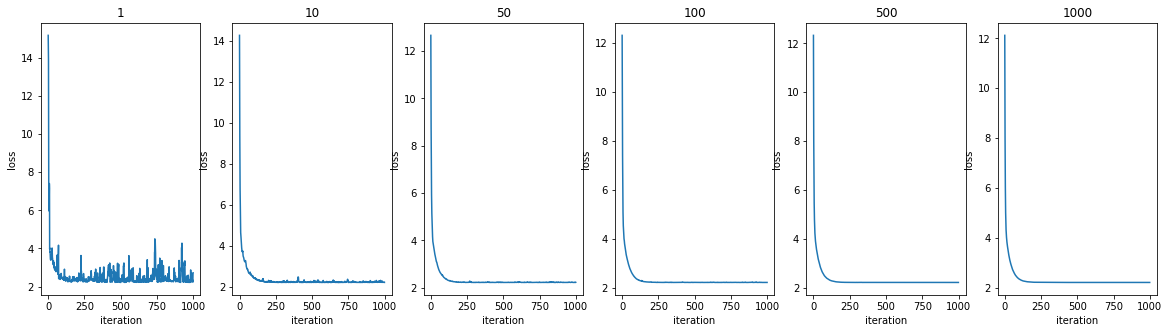

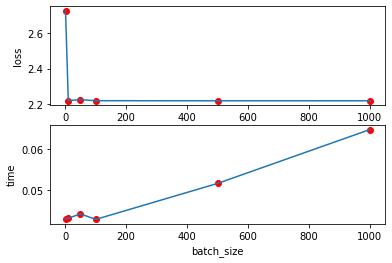

In [367]:
loss = [] # list to store loss for each iteration for mini batch SGD
# We could have also considered batch sizes which were powers of 2, but these batch sizes seemed to be slighly more intuitive in this case
r = (1, 10, 50, 100, 500, 1000)   # batch of size 1 corresponds to Storchastic Gradient Descent
fig, axs = plt.subplots(1, len(r), figsize=(20,5))
f = 0

batch_loss = []  # Final loss of mini batch SGD with sizes corresponding to the sizes in r
batch_time = []  # Total time taken by minibatch SGD for each batch

for i in r:
    # Same random initialization
    np.random.seed(0)
    init_ = np.random.randn(2)
    
    # Run mini batch SGD
    tick = time.time()
    w, hist = mini_batch_sgd(X=X_given, Y=y_given, init_=init_, b_size=i, n_iter=1000, learn_rate=0.01)
    tock = time.time()
    
    # Compute loss vs iteration plot for each weight in history
    loss = []
    for j in range(len(hist)):
        l = MSE_loss(X_given, y_given, hist[j])
        loss.append(l)
        if j == len(hist)-1:
            batch_loss.append(l)
    
    # Computer average time for execution of Mini Batch SGD
    T = 0
    for _ in range(50):
        # The same initialization is used for uniformity
        np.random.seed(0)
        init_ = np.random.randn(2)
        
        tick = time.time()
        w, hist = mini_batch_sgd(X=X_given, Y=y_given, init_=init_, b_size=i, n_iter=1000, learn_rate=0.01)
        tock = time.time()
        T += tock - tick
    
    print("Batch Size ", i,"ran for ",len(hist), "iterations in ", T/50,"s. Loss is ", MSE_loss(X_given, y_given, w))
    # Plotting individual loss vs iteration
    batch_time.append(T/50)
    axs[f].plot(loss)
    axs[f].set_title(str(i))
    axs[f].set(xlabel='iteration', ylabel='loss')
    f +=1

# Plotting total loss and time taken for each batch size
fig2, ax = plt.subplots(2)

ax[0].plot(r, batch_loss)
ax[0].scatter(r, batch_loss, color='r')
ax[0].set(xlabel='batch_size', ylabel='loss')

ax[1].scatter(r, batch_time, color='r')
ax[1].plot(r, batch_time)
ax[1].set(xlabel='batch_size', ylabel='time')

## Q1 (e) Interpretting the findings  
Normal gradient descent converged in 705 iterations and took a total of 0.0407 s to run. 
SGD on the other hand ran for 1000 iterations in 0.0428 s. If we were to consider only 705 iterations, SGD would have been faster but it does not converge in those number of iterations.  

By visual inspection, it seems that SGD might be touching lower losses compared to vanilla GD in lesser iterations, but the plot is very noisy. So, while it may tend to reach the optimal region faster, convergence can be very tough.  

Also, in this case, sampling is done for each iteration. This might be a reason that the performance of SGD is slighly slower compared to GD. But it is easy to see that each individual iteration of SGD takes lesser time compared to GD.  
$\frac{0.0428}{1000} = 0.0000428 < \frac{0.04129}{705} = 0.0000585$


### Mini Batch sizes

We can see the results for various batch sizes. For smaller batch sizes there seems to be some kind of discripancy in the ordering of the time but after a batch size of about 50, the time taken increases linearly. This might have something to do with programming quirks like shuffling or vectorised operations but the trend in general is clear, namely, larger batch sizes take more time.   

Another metric to be seen while commenting on the best batch size is the loss. 
SGD (batch size = 1) does not give good convergence; it can also be seen from the loss plot that it is very noisy.  
Batch sizes of 10 and 50 start giving final lose quite close to the optimal one, but the plot still shows some noise.  

With that respect, a batch size of 100 seems to be ideal. The loss plot is smooth and even the time taken is comparable to SGD, batch size 10 and 50.   

One pitfall to note is that the time taken is still more than the normal Gradient Descent Algorithm. But that bottleneck is due to the sampling at each iteration. But a point supporting the Mini Batch SGD is that even though Mini Batch SGD runs for much more numer of iterations than GD, the time difference is only marginal.  
Also, since the overall time per iteration would be lesser than the one in GD, the algorithm would get closer to the optimal loss faster.


## Additional - Optimizations on Sampling
Here we try to make use of one randomized sampling for multiple iterations. Notice that here, we create a permutation of the total dataset. We can then considers chunks of size b_size and keep iterating on that permutation until we reach the end. Note that the number of iterations still remains n_iter. (Our code takes care of that)  

This saves us from sampling at each and every iteration while still being equivalent to the "sampling in each iteration" in some sense.  

Here the results start making more sense, as batches take substantially less time than normal GD inspite of running for more iterations. This is mainly because we run that sampling procedure lesser number of times.

In [363]:
# Please NOTE : Even though there seem to be nested loops, the number of iterations will only be n_iter
# More precisely, gradient descent will only be run on at most n_iter batches and not more than that
def mini_batch_sgd2(X, Y, init_, b_size=1, learn_rate=0.1, n_iter=50, tol=1e-06):
    w = init_.copy()
    hist = []
    # seed in order to ensure reproducibility when picking random indices
    np.random.seed(0)
    i = 0
    while i < n_iter:
        # Shuffle indices
        indices = np.random.permutation(X.shape[0])
        for j in range(0, X.shape[0], b_size):
            # Keep taking arrays of size b_size 
            # otherwise, a lot of the indices get wasted and batch SGD becomes slower
            
            # max iterations done; finish function
            if i >= n_iter:
                return w, hist
            
            # create batch
            batch_idx = indices[j: j + b_size]
            x = X[batch_idx]
            y = Y[batch_idx]
            if(x.shape[0]==0):
                continue
            
            # Compute gradient on batch
            grad = regression_gradient(w=w, X=x, y=y)
            if np.all(np.abs(grad) <= tol):
                return w, hist
                break # The values are small enough which means we have reached an optima
            # Update weights using gradient descent
            w += -learn_rate * grad
            
            # Store weights in history for further visualization help and calculation of losses
            hist.append(w.copy())
            i = i+1 # counter for number of iterations done incremented
    return w, hist

Batch Size  1 ran for  1000 iterations in  0.025357789993286133 s. Loss is  2.3734224771606898
Batch Size  10 ran for  1000 iterations in  0.021607990264892577 s. Loss is  2.2213871692851064
Batch Size  50 ran for  1000 iterations in  0.021888322830200195 s. Loss is  2.222376299512144
Batch Size  100 ran for  1000 iterations in  0.022902889251708983 s. Loss is  2.21881484645855
Batch Size  500 ran for  1000 iterations in  0.0321103572845459 s. Loss is  2.218926107975832
Batch Size  1000 ran for  1000 iterations in  0.04105856418609619 s. Loss is  2.218721456986865


[Text(0.5, 0, 'batch_size'), Text(0, 0.5, 'time')]

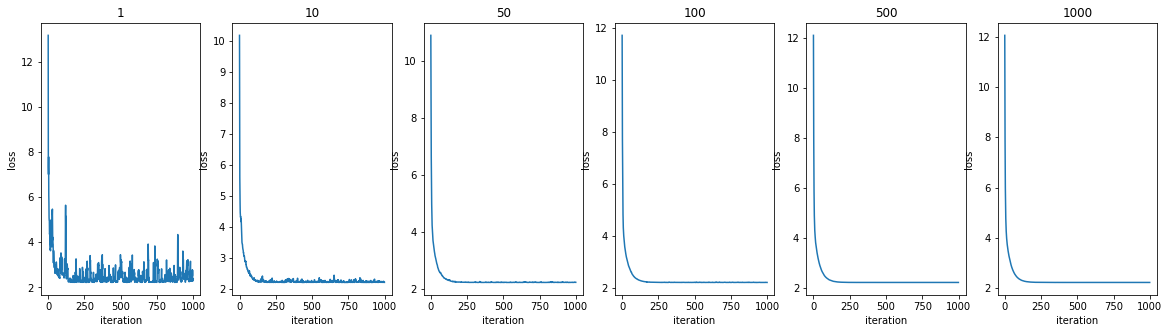

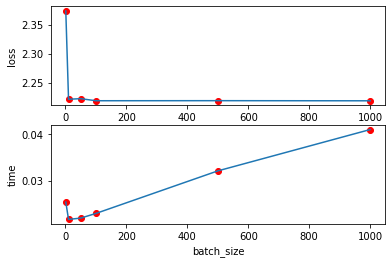

In [369]:
loss = []
# batch of size 1 corresponds to Storchastic Gradient Descent
r = (1, 10, 50, 100, 500, 1000)
fig, axs = plt.subplots(1, len(r), figsize=(20,5))
f = 0

batch_loss = []  # Final loss of mini batch SGD with sizes corresponding to the sizes in r
batch_time = []  # Total time taken by minibatch SGD for each batch
for i in r:
    # Same random initialization
    np.random.seed(0)
    init_ = np.random.randn(2)
    
    
    tick = time.time()
    w, hist = mini_batch_sgd2(X=X_given, Y=y_given, init_=init_, b_size=i, n_iter=1000, learn_rate=0.01)
    tock = time.time()
    
    loss = []
    for j in range(len(hist)):
        l = MSE_loss(X_given, y_given, hist[j])
        loss.append(l)
        if j == len(hist)-1:
            batch_loss.append(l)
    
    # Computer average time for execution of Mini Batch SGD
    T = 0
    for _ in range(50):
        np.random.seed(0)
        init_ = np.random.randn(2)
        tick = time.time()
        w, hist = mini_batch_sgd2(X=X_given, Y=y_given, init_=init_, b_size=i, n_iter=1000, learn_rate=0.01)
        tock = time.time()
        T += tock - tick
    
    # Plotting individual loss vs iteration
    print("Batch Size ", i,"ran for ",len(hist), "iterations in ", T/50,"s. Loss is ", MSE_loss(X_given, y_given, w))
    batch_time.append(T/50)
    axs[f].plot(loss)
    axs[f].set_title(str(i))
    axs[f].set(xlabel='iteration', ylabel='loss')
    f +=1

fig2, ax = plt.subplots(2)
ax[0].plot(r, batch_loss)
ax[0].scatter(r, batch_loss, color='r')
ax[0].set(xlabel='batch_size', ylabel='loss')

ax[1].scatter(r, batch_time, color='r')
ax[1].plot(r, batch_time)
ax[1].set(xlabel='batch_size', ylabel='time')

# Q2 - Bayesian Networks 
## i)
We have $P(Cold)$ and $P(Fever|Cold)$ from the network. 
We require $P(Cold=T, Fever=T)$  
$P(Cold=T, Fever=T) = P(Cold=T\ |\ Fever = T) P(Fever=T)$  
From Baye's Rule : $P(Cold=T\ |\ Fever=T) = \frac{P(Fever=T\ |\ Cold=T)P(Cold=T)}{P(Fever=T)}$  

From the network :  
$P(Fever=T|Cold=T) = 0.307$  
$P(Cold=T) = 0.02$  
$P(Fever=T) = P(Fever=T|Cold=T)P(Cold=T)\ +\ P(Fever=T|Cold=F)P(Cold=F) = (0.307)(0.02)\ +\ (0.693)(0.98) = 0.68528$  

Therefore, $P(Cold=T|Fever=T) = \frac{(0.307)(0.02)}{0.68528} (0.68528) = 0.00614$

## ii) Find P(cold= T | cough = T)
Here we will make use of Baye's Rule : 
$P(Cold \mid Cough) = \frac{P(Cough \mid Cold)P(Cold)}{P(Cough)}$  

For convenience, we will refer to Lung Disease as LD and Smokes as S.  
$Cold$ denotes the event that the person has Cold while $\overline{Cold}$ denotes that the person does not have cold. This same notation is extended for other random variables as well.  
From the tables, we have info about $P(Cold),\ P(Cough \mid Cold, LD),\ P(LD \mid Smokes),\ P(Smokes)$  

From this we can find $P(LD).$  
This will be helpful when we need to find $P(Cold, Cough)$.  
$$P(LD) = P(LD, S) + P(LD, \overline{S})$$   
$$\implies P(LD) = P(LD=T \mid S)P(S) + P(LD \mid \overline{S})P(\overline{S})$$  
$$\implies P(LD=T) = (0.1009 \times 0.2) + (0.001 \times 0.8) = 0.02098$$   
Therefore $\fbox{$P(LD) = 0.02098$ and $P(\overline{LD}) = 0.97092$}$ 

Now we find $P(Cough)$  
Notice that $P(Cough) = \sum_{(Cold, LD)} P(Cough, Cold, LD) = \sum_{(Cold, LD)} P(Cough \mid Cold, LD) P(Cold, LD)$  
From the network, we can deduce that Cold and Lung Disease are independent variables.  
$$\implies P(Cough) = \sum_{(Cold, LD)} P(Cough \mid Cold, LD)P(Cold)P(LD)$$
$$ \implies P(Cough) = P(Cough \mid Cold, LD)P(Cold)P(LD) + P(Cough \mid \overline{Cold}, LD)P(\overline{Cold})P(LD) + P(Cough \mid Cold, \overline{LD})P(Cold)P(\overline{LD}) + P(Cough \mid \overline{Cold}, \overline{LD})P(\overline{Cold})P(\overline{LD}) $$  
$$\implies P(Cough) = (0.7525 \times 0.02 \times 0.02098) + (0.505 \times 0.9 \times 0.02098) + (0.505 \times 0.02 \times 0.97902) + (0.01 \times 0.98 \times 0.97902)$$  
$$\fbox{P(Cough) = 0.030181249}$$  

Now the only thing we require is $P(Cough \mid Cold)$  
We will use the law of total probabiliy and the fact that Cough and Cold are independent : 
$$P(Cough \mid Cold) = P(Cough \mid Cold, LD) P(LD) + P(Cough \mid Cold, \overline{LD})P(\overline{LD})$$
$$\implies P(Cough \mid Cold) = (0.7525 \times 0.02098) + (0.505 \times 0.97902)$$.  
$$\fbox{$P(Cough \mid Cold) = 0.51019255$}$$

**Proof** :   
Let us consider 3 random variables $X_1, X_2, X_3$ such that $X_2$ and $X_3$ are independent.  
We claim $P(X_1 \mid X_2) = P(X_1 \mid X_2, X_3) P(X_3) + P(X_1 \mid X_2, \overline{X_3}) P(\overline{X_3})$  
Notice that $$P(X_1 \mid X_2, X_3) P(X_3) = \frac{P(X_1, X_2, X_3)}{P(X_2, X_3)} P(X_3)$$  
$$\implies P(X_1 \mid X_2, X_3) P(X_3) = \frac{P(X_1, X_2, X_3)}{P(X_2)P(X_3)} P(X_3) = \frac{P(X_1, X_2, X_3)}{P(X_2)} $$  
Using similar arguments, we can say that $$P(X_1 \mid X_2, \overline{X_3}) P(\overline{X_3}) =  \frac{P(X_1, X_2, \overline{X_3})}{P(X_2)}$$  
Therefore, $$ P(X_1 \mid X_2, X_3) P(X_3) + P(X_1 \mid X_2, \overline{X_3})P(\overline{X_3}) = \frac{P(X_1, X_2, X_3)}{P(X_2)} + \frac{P(X_1, X_2, \overline{X_3})}{P(X_2)} = \frac{P(X_1, X_2)}{X_2} = P(X_1 \mid X_2)$$  

Finally, we plug all these values into the expression to get the answer : 
$$ P(Cold \mid Cough) = \frac{P(Cough \mid Cold)P(Cold)}{P(Cough)} = \frac{0.51019255 \times 0.02}{0.030181249} =  0.33808577637062004$$  
**Answer :**  $$\fbox{$P(Cold \mid Cough) = 0.33808577637062004$}$$

In [371]:
# Scratch Pad
p_cough = (0.7525*0.02*0.02098) + (0.505*0.98*0.02098) + (0.505*0.02*0.97902) + (0.01*0.98*0.97902)
print(p_cough)

p_cough_given_cold = (0.7525*0.02098) + (0.505*0.97902)
print(p_cough_given_cold)

ans = p_cough_given_cold * 0.02 / p_cough
ans

0.030181249
0.51019255


0.33808577637062004

# Q3 - Mutlinomial Distribution
$f(x_1, x_2, \dots x_k \mid p_1, p_2 \dots, p_k) = \frac{n!}{\Pi_{i=1}^kx_i!} \Pi_{i=1}^k p_i^{x_i}$ 

We now consider the log likelihood :  
$l(p_1, p_2, \dots p_k) = \log(n!) - \sum_{i=1}^k \log(x_i!) + \sum_{i=1}^k x_i \log(p_i)$  
Notice that the first 2 terms are common so when we construct the Lagrangian, they aren;t of any consequence. Hence we drop those 2 terms for brevity in further calculations  

We will now construct a Lagrangian with multiple constraints : 
$\sum_{i=1}^k p_i = 1 $ AND $p_i \geq 0 \forall i$  

$f(\vec{p}) = \sum_{i=1}^k x_i \log(p_i)$  
$g_i(\vec{p}) = -\alpha_i p_i\ \forall i = {1, 2, \dots k}$   
$h(\vec{p}) = 1 - \sum_{i=1}^k p_i$  

No consider the primal and dual problems :   
$\hat{p_P} = \underset{\vec{p}}{argmin} \{ \underset{\vec{\alpha \geq 0, \beta}}{argmax} \{ \sum_{i=1}^k x_i \log(p_i) - \sum_{i=1}^k \alpha_i (-p_i)  \} + \beta (1 - \sum_{i=1}^k p_i) \}$  
$\hat{p_D} = \underset{\vec{\alpha \geq 0, \beta}}{argmax} \{ \underset{\vec{p}}{argmin} \{ \sum_{i=1}^k x_i \log(p_i) - \sum_{i=1}^k \alpha_i (-p_i)  \} + \beta (1 - \sum_{i=1}^k p_i) \}$  

We will work with the dual version.  
Let the function inside the innermost bracket be denoted by $F_1$  
We first differentiate $F_1$ with respect to $\vec{p}$  
$\frac{\partial F_1}{\partial p_i} = \frac{x_i}{p_i} - \alpha_i - \beta = 0$  
Therefore, $p_i = \frac{x_i}{\alpha_i + \beta}\ \forall i \in {1, 2, \dots, k}$  

Now we can subsitute the value for $p_i$ in $F_1$ and differentiate with respect to $\alpha_i$ and $\beta$.  
$F_2 = \sum_{i=1}^k x_i \log(\frac{x_i}{\alpha_i + \beta}) - \sum_{i=1}^k \frac{\alpha_i x_i}{\alpha_i + \beta} + \beta (1 - \sum_{i=1}^k \frac{x_i}{\alpha_i + \beta})$  
\
$\frac{\partial F_2}{\partial \alpha_j} = \frac{- x_j}{\alpha_j + \beta} - \frac{(\alpha_j + \beta)x_j - \alpha_j x_j}{(\alpha_j + \beta)^2} + \frac{\beta x_j}{(\alpha_j + \beta)^2} = \frac{-x_j}{\alpha_j + \beta}$  
Since we need to maximize with respect to $\alpha_j$, we notice that the derivative is decreasing.   
Hence, $\alpha_j = 0\ \ \  \forall j \in {1,2 \dots k}$  

We also differentiate with respect to $\beta$   
$\frac{\partial F_2}{\partial \beta} = \sum_{i=1}^k \frac{-x_i}{\alpha_i + \beta} + \sum_{i=1}^k \frac{\alpha_i x_i}{(\alpha_i + \beta)^2} + 1 - \sum_{i=1}^k \frac{\alpha_i x_i}{(\alpha_i +\beta)^2} = 0$  
Therefore, $\sum_{i=1}^k \frac{-x_i}{\alpha_i + \beta} + 1 = 0$  
Since $\alpha_i = 0$, we get $\beta = \sum_{i=1}^k x_i$.  

We can substitute $\alpha_i$ and $\beta$ in $p_i$ to get :  
$p_i^{MLE} = \frac{x_i}{\sum_{i=1}^k x_i} = \frac{x_i}{n} \forall i \in {1,2 \dots k}$